### Data source:

The data is from US department of education, you can download the data here: https://ed-public-download.apps.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip.

For detailed explaination of each column, you can see the database documentation: https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf

In [1]:
!wget https://ed-public-download.apps.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

--2016-12-05 04:10:53--  https://ed-public-download.apps.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip
Resolving ed-public-download.apps.cloud.gov (ed-public-download.apps.cloud.gov)... 52.200.27.11, 54.85.34.4, 2406:da00:ff00::3655:2204, ...
Connecting to ed-public-download.apps.cloud.gov (ed-public-download.apps.cloud.gov)|52.200.27.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240264190 (229M) [application/zip]
Saving to: ‘CollegeScorecard_Raw_Data.zip’

CollegeScorecard_Ra 100%[=====================>] 229.13M  27.6MB/s   in 9.0s   

2016-12-05 04:11:07 (25.4 MB/s) - ‘CollegeScorecard_Raw_Data.zip’ saved [240264190/240264190]



In [2]:
!unzip CollegeScorecard_Raw_Data.zip

Archive:  CollegeScorecard_Raw_Data.zip
  inflating: Crosswalks_20160908.zip  
  inflating: MERGED1996_97_PP.csv    
  inflating: MERGED1997_98_PP.csv    
  inflating: MERGED1998_99_PP.csv    
  inflating: MERGED1999_00_PP.csv    
  inflating: MERGED2000_01_PP.csv    
  inflating: MERGED2001_02_PP.csv    
  inflating: MERGED2002_03_PP.csv    
  inflating: MERGED2003_04_PP.csv    
  inflating: MERGED2004_05_PP.csv    
  inflating: MERGED2005_06_PP.csv    
  inflating: MERGED2006_07_PP.csv    
  inflating: MERGED2007_08_PP.csv    
  inflating: MERGED2008_09_PP.csv    
  inflating: MERGED2009_10_PP.csv    
  inflating: MERGED2010_11_PP.csv    
  inflating: MERGED2011_12_PP.csv    
  inflating: MERGED2012_13_PP.csv    
  inflating: MERGED2013_14_PP.csv    
  inflating: MERGED2014_15_PP.csv    


In [3]:
!csvstack -g 2006,2007,2008,2009,2010 MERGED2006_07_PP.csv MERGED2007_08_PP.csv MERGED2008_09_PP.csv MERGED2009_10_PP.csv MERGED2010_11_PP.csv > Education.csv

### Choose useful columns to create new datasets

I choose 25 columns that correlated with 7 aspects (listed in the order as the database)

### Basic information about Institutions
    INSTITUTION CHAR(94),
    CITY CHAR(25),
    STABBR CHAR(2),
    ZIP CHAR(11),
    
### Award of the institution    
    HIGHDEG INT,
    ICLEVEL CHAR(11),
    
    There are several elements that identify the degree profile of the institution. Highest degree (HIGHDEG) identifies the highest award level. This designation differs from the highest degree element in that it is based on an institution’s reported offerings, rather than on degree or certificate completions. For example, an institution may offer a bachelor’s degree program but only infrequently have students that earn the degree. The level of institution element would consistently classify this institution as 4-year, but the highest degree element would potentially vary from year-to-year.
    
### Administration rate    
    ADM_RATE CHAR(18),
    ADM_RATE_ALL CHAR(18),
    
    For institutions with multiple branches, ADM_RATE includes the admissions rate at each campus, while ADM_RATE_ALL represents the admissions rate across all campuses, defined as the total number of admitted undergraduates across all branches divided by the total number of undergraduates who applied across all branches.
    
### SAT scores
    SAT_AVG CHAR(8),
    SAT_AVG_ALL CHAR(8),
    
### Retention rate
    RET_FT4 CHAR(18),
    RET_FTL4 CHAR(18),
    RET_PT4 CHAR(18),
    RET_PTL4 CHAR(18),
    
    Available through the IPEDS Fall Enrollment component, retention rate identifies (separately) the share of full-time and part-time students in the prior year, at four-year (RET_FT4 and RET_PT4) and less-than-four- year institutions (RET_FTL4 and RET_PTL4), who return to the institution after the first year.
    
### Family income
    INC_PCT_LO CHAR(18),
    INC_PCT_M1 CHAR(18),
    INC_PCT_M2 CHAR(18),
    INC_PCT_H1 CHAR(18),
    INC_PCT_H2 CHAR(18),
    
    Using data from NSLDS, these elements calculate the percentage of Title IV-receiving students who had family income data from the Free Application for Federal Student Aid (FAFSA) for each of five income quintiles16 (INC_PCT_LO = $0-$30,000; INC_PCT_M1 = $30,001-$48,000; INC_PCT_M2=$48,001-$75,000; INC_PCT_H1=$75,001-$110,000; and INC_PCT_H2 = $110,001+). 
    
### Debt of students
    DEBT_MDN CHAR(18),   
    GRAD_DEBT_MDN CHAR(18),
    WDRAW_DEBT_MDN CHAR(18),
    LO_INC_DEBT_MDN CHAR(18),
    MD_INC_DEBT_MDN CHAR(18),
    HI_INC_DEBT_MDN CHAR(18)
    
    This is the median loan debt accumulatedat the institution by all student borrowers of federal loans who separate (i.e., either graduate or withdraw) in a given fiscal year, measured at the point of separation (DEBT_MDN).More specifically, the measure represents the sum of all undergraduate federal loans over students’ college education at the institution for which the median debt is reported for —e.g., if a student receives a federal loan for $2,000 for each of eight semesters at one institution,their cumulative debt is recorded as $16,000 forthat institution.
    These data are available for all borrowers at the institution, as well as disaggregated by completion status (GRAD_DEBT_MDN for students who completed and WDRAW_DEBT_MDN for students who withdrew without completing25); by FAFSA family income26 (LO_INC_DEBT_MDN = $0-$30,000; MD_INC_DEBT_MDN = $30,001-$75,000; and HI_INC_DEBT_MDN = $75,001+); 
    
### Earnings
    MN_EARN_WNE_P6 CHAR(18),
    MN_EARN_WNE_P7 CHAR(18),
    MN_EARN_WNE_P8 CHAR(18),
    MN_EARN_WNE_P9 CHAR(18),
    MN_EARN_WNE_P10 CHAR(18),
    MD_EARN_WNE_P6 CHAR(18),
    MD_EARN_WNE_P8 CHAR(18),
    MD_EARN_WNE_P10 CHAR(18)
    
    Mean (MN_EARN_WNE_P*) and median (MD_EARN_WNE_P*) earnings are for the institutional aggregate of all federally aided students who enroll in an institution each year and who are employed but not enrolled. Earnings are defined as the sum of wages and deferred compensation from all non-duplicate W-2 forms received for each individual, plus positive self- employment earnings from Schedule SE. Data are available for each year starting six years after a student enrolls in college, up to 10 years after the student enrolls; enrollment dates are estimated based on FAFSA self-reporting, as with the completion rate cohort construction described above.
    
    Mean earnings are also available disaggregated by FAFSA family income31 (MN_EARN_WNE_INC1_P*, MN_EARN_WNE_INC2_P*, and MN_EARN_WNE_INC3_P*); by dependent status (for dependents, MN_EARN_WNE_INDEP0 _P*; and for independents, MN_EARN_WNE_INDEP1_P*); and by gender (for female, MN_EARN_WNE_MALE0_P*; and for male, MN_EARN_WNE_MALE1_P*).



In [4]:
!csvcut -c1,5,6,7,8,17,1740,38,39,61,62,430,431,432,433,1409,1414,1415,1416,1417,1505,1506,1507,1508,1509,1510,1666,1692,1697,1707,1640,1667,1698,1641 Education.csv > FinalEducation.csv

In [5]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [6]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [7]:
!createdb -U dbuser education1

In [8]:
%sql postgresql://dbuser@localhost:5432/education1

'Connected: dbuser@education1'

### Load csv to database and add corresponding year for every record

In [9]:
!csvstat FinalEducation.csv

  1. group
	<class 'int'>
	Nulls: False
	Values: 2008, 2009, 2010, 2006, 2007
  2. INSTNM
	<class 'str'>
	Nulls: False
	Unique values: 8026
	5 most frequent values:
		Southwestern College:	38
		Marinello School of Beauty:	35
		ATI Career Training Center:	29
		McCann School of Business & Technology:	23
		Stevens-Henager College:	20
	Max length: 93
  3. CITY
	<class 'str'>
	Nulls: False
	Unique values: 2633
	5 most frequent values:
		New York:	417
		Chicago:	402
		Houston:	342
		Los Angeles:	282
		Brooklyn:	248
	Max length: 24
  4. STABBR
	<class 'str'>
	Nulls: False
	Unique values: 59
	5 most frequent values:
		CA:	3441
		NY:	2247
		TX:	2018
		PA:	2008
		FL:	1824
	Max length: 2
  5. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 6625
	5 most frequent values:
		90010:	38
		00961:	34
		07306:	33
		02116:	30
		32256:	30
	Max length: 10
  6. HIGHDEG
	<class 'int'>
	Nulls: False
	Values: 0, 1, 2, 3, 4
  7. ICLEVEL
	<class 'int'>
	Nulls: True
	Values: 1, 2, 3
  8. ADM_RATE
	<class 'float'>


In [11]:
!csvcut -n FinalEducation.csv

  1: group
  2: INSTNM
  3: CITY
  4: STABBR
  5: ZIP
  6: HIGHDEG
  7: ICLEVEL
  8: ADM_RATE
  9: ADM_RATE_ALL
 10: SAT_AVG
 11: SAT_AVG_ALL
 12: RET_FT4
 13: RET_FTL4
 14: RET_PT4
 15: RET_PTL4
 16: INC_PCT_LO
 17: INC_PCT_M1
 18: INC_PCT_M2
 19: INC_PCT_H1
 20: INC_PCT_H2
 21: DEBT_MDN
 22: GRAD_DEBT_MDN
 23: WDRAW_DEBT_MDN
 24: LO_INC_DEBT_MDN
 25: MD_INC_DEBT_MDN
 26: HI_INC_DEBT_MDN
 27: MN_EARN_WNE_P6
 28: MN_EARN_WNE_P7
 29: MN_EARN_WNE_P8
 30: MN_EARN_WNE_P9
 31: MN_EARN_WNE_P10
 32: MD_EARN_WNE_P6
 33: MD_EARN_WNE_P8
 34: MD_EARN_WNE_P10


In [12]:
!csvcut -n Education.csv

  1: group
  2: ﻿UNITID
  3: OPEID
  4: OPEID6
  5: INSTNM
  6: CITY
  7: STABBR
  8: ZIP
  9: ACCREDAGENCY
 10: INSTURL
 11: NPCURL
 12: SCH_DEG
 13: HCM2
 14: MAIN
 15: NUMBRANCH
 16: PREDDEG
 17: HIGHDEG
 18: CONTROL
 19: ST_FIPS
 20: REGION
 21: LOCALE
 22: LOCALE2
 23: LATITUDE
 24: LONGITUDE
 25: CCBASIC
 26: CCUGPROF
 27: CCSIZSET
 28: HBCU
 29: PBI
 30: ANNHI
 31: TRIBAL
 32: AANAPII
 33: HSI
 34: NANTI
 35: MENONLY
 36: WOMENONLY
 37: RELAFFIL
 38: ADM_RATE
 39: ADM_RATE_ALL
 40: SATVR25
 41: SATVR75
 42: SATMT25
 43: SATMT75
 44: SATWR25
 45: SATWR75
 46: SATVRMID
 47: SATMTMID
 48: SATWRMID
 49: ACTCM25
 50: ACTCM75
 51: ACTEN25
 52: ACTEN75
 53: ACTMT25
 54: ACTMT75
 55: ACTWR25
 56: ACTWR75
 57: ACTCMMID
 58: ACTENMID
 59: ACTMTMID
 60: ACTWRMID
 61: SAT_AVG
 62: SAT_AVG_ALL
 63: PCIP01
 64: PCIP03
 65: PCIP04
 66: PCIP05
 67: PCIP09
 68: PCIP10
 69: PCIP11
 70: PCIP12
 71: PCIP13
 72: PCIP14
 73: PCIP15
 74: PCIP16
 75: PCIP19
 76: PCIP22
 77: PCIP23
 78: PCIP24
 79: PCIP

In [13]:
%%sql
DROP TABLE IF EXISTS education15;
CREATE TABLE education15 (
    YEAR INT,
    INSTITUTION VARCHAR(94),
    CITY VARCHAR(25),
    STABBR VARCHAR(2),
    ZIP VARCHAR(11),
    HIGHDEG INT,
    ICLEVEL VARCHAR(11),
    ADM_RATE VARCHAR(18),
    ADM_RATE_ALL VARCHAR(18),
    SAT_AVG VARCHAR(8),
    SAT_AVG_ALL VARCHAR(8),
    RET_FT4 VARCHAR(18),
    RET_FTL4 VARCHAR(18),
    RET_PT4 VARCHAR(18),
    RET_PTL4 VARCHAR(18),
    INC_PCT_LO VARCHAR(18),
    INC_PCT_M1 VARCHAR(18),
    INC_PCT_M2 VARCHAR(18),
    INC_PCT_H1 VARCHAR(18),
    INC_PCT_H2 VARCHAR(18),
    DEBT_MDN VARCHAR(18),   
    GRAD_DEBT_MDN VARCHAR(18),
    WDRAW_DEBT_MDN VARCHAR(18),
    LO_INC_DEBT_MDN VARCHAR(18),
    MD_INC_DEBT_MDN VARCHAR(18),
    HI_INC_DEBT_MDN VARCHAR(18),
    MN_EARN_WNE_P6 VARCHAR(18),
    MN_EARN_WNE_P7 VARCHAR(18),
    MN_EARN_WNE_P8 VARCHAR(18),
    MN_EARN_WNE_P9 VARCHAR(18),
    MN_EARN_WNE_P10 VARCHAR(18),
    MD_EARN_WNE_P6 VARCHAR(18),
    MD_EARN_WNE_P8 VARCHAR(18),
    MD_EARN_WNE_P10 VARCHAR(18)
    )

Done.
Done.


[]

In [14]:
%%sql
COPY education15 FROM '/home/jovyan/work/FinalEducation.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

35276 rows affected.


[]

In [15]:
%%sql
SELECT count(education15.SAT_AVG) 
    FROM education15
    WHERE SAT_AVG NOT LIKE 'NULL';


1 rows affected.


count
7263


In [16]:
%%sql
SELECT * 
FROM education15
ORDER BY ZIP DESC
LIMIT 10;

10 rows affected.


year,institution,city,stabbr,zip,highdeg,iclevel,adm_rate,adm_rate_all,sat_avg,sat_avg_all,ret_ft4,ret_ftl4,ret_pt4,ret_ptl4,inc_pct_lo,inc_pct_m1,inc_pct_m2,inc_pct_h1,inc_pct_h2,debt_mdn,grad_debt_mdn,wdraw_debt_mdn,lo_inc_debt_mdn,md_inc_debt_mdn,hi_inc_debt_mdn,mn_earn_wne_p6,mn_earn_wne_p7,mn_earn_wne_p8,mn_earn_wne_p9,mn_earn_wne_p10,md_earn_wne_p6,md_earn_wne_p8,md_earn_wne_p10
2006,Sheldon Jackson College,Sitka,AK,99835-7699,3,1,NULL,NULL,NULL,NULL,0.57,NULL,NULL,NULL,0.5230769231,PrivacySuppressed,0.1538461538,PrivacySuppressed,PrivacySuppressed,7250,PrivacySuppressed,6625,8875,6625,3937,NULL,30200,NULL,33500,NULL,NULL,NULL,NULL
2007,University of Alaska Southeast,Juneau,AK,99801-8697,4,1,0.7161,0.7161,1057,1057,0.443,NULL,0.3636,NULL,0.4817518248,0.1733576642,0.1715328467,0.1094890511,0.0638686131,5475.5,12325,4500,6160,5500,3500,35000,NULL,35200,NULL,38400,34100,34900,38300
2008,University of Alaska Southeast,Juneau,AK,99801-8697,4,1,0.7034,0.7034,991,991,0.551,NULL,0.25,NULL,0.5064724919,0.1618122977,0.1601941748,0.1100323625,0.0614886731,5500,15555,5322.5,5832,5500,4692.5,NULL,35300,NULL,37700,NULL,NULL,NULL,NULL
2009,University of Alaska Southeast,Juneau,AK,99801-8697,4,1,NULL,NULL,NULL,NULL,0.6147,NULL,0.4286,NULL,0.5173745174,0.1647361647,0.1428571429,0.1171171171,0.0579150579,5500,11122,5500,5500,6353,5500,33500,NULL,35900,NULL,38300,31000,34700,35000
2010,University of Alaska Southeast,Juneau,AK,99801-8697,4,1,NULL,NULL,NULL,NULL,0.6344,NULL,0.5417,NULL,0.506010929,0.1672131148,0.1453551913,0.1136612022,0.0677595628,6500,13552,5506,6250,7083,6481,NULL,35000,NULL,38600,NULL,NULL,NULL,NULL
2006,University of Alaska Southeast,Juneau,AK,99801-8697,4,1,0.7315,0.7315,1019,1019,0.55,NULL,0.4,NULL,0.520661157,0.1818181818,0.1504132231,0.1024793388,0.0446280992,4914.5,11376,3810.5,5500,5250,3500,NULL,33400,NULL,36800,NULL,NULL,NULL,NULL
2006,University of Alaska Fairbanks,Fairbanks,AK,99775-7500,4,1,0.7602,0.7602,1031,1031,0.74,NULL,0.38,NULL,0.5106499181,0.1698525396,0.1474604042,0.1163298744,0.0557072638,4417,9187.5,3500,5500,3938,3182,NULL,34500,NULL,39000,NULL,NULL,NULL,NULL
2009,University of Alaska Fairbanks,Fairbanks,AK,99775-7500,4,1,0.7446,0.7446,1023,1023,0.802,NULL,0.5333,NULL,0.4576828266,0.1610517666,0.1585866886,0.1273623665,0.0953163517,5500,11062.5,5500,7007,5500,5500,34800,NULL,38300,NULL,40100,31100,34200,36200
2010,University of Alaska Fairbanks,Fairbanks,AK,99775-7500,4,1,NULL,NULL,NULL,NULL,0.763,NULL,0.5714,NULL,0.4823616784,0.1786112143,0.1399925733,0.1128852581,0.0861492759,6250.5,14500,5500,6893,6961,5500,NULL,36800,NULL,41600,NULL,NULL,NULL,NULL
2008,University of Alaska Fairbanks,Fairbanks,AK,99775-7500,4,1,0.7084,0.7084,999,999,0.7266,NULL,0.5455,NULL,0.4537937743,0.170233463,0.15807393,0.1259727626,0.09192607,5500,9000,4750,6250,5258,4625,NULL,36200,NULL,38300,NULL,NULL,NULL,NULL


In [17]:
%%sql 
SELECT CAST(SAT_AVG AS INT), CAST(ADM_RATE AS NUMERIC)
FROM education15
WHERE SAT_AVG NOT LIKE 'NULL'
    AND ADM_RATE NOT LIKE 'NULL'
LIMIT 10;

10 rows affected.


sat_avg,adm_rate
870,0.4118
1095,0.8778
1109,0.8834
785,0.6698
1113,0.7004
970,0.9801
1125,0.7248
1167,0.5701
973,0.6529
1016,0.6187


In [18]:
import matplotlib.pyplot as plt
from pandas import DataFrame
result= _
df=result.DataFrame()

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


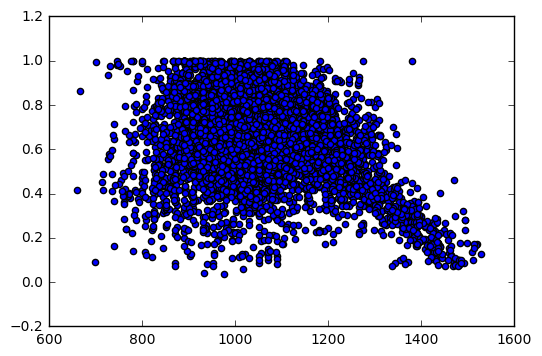

In [18]:
plt.scatter(df["sat_avg"],df["adm_rate"])

# Creating the StarSchema

In [19]:
%%sql
DROP TABLE IF EXISTS location_D;
CREATE TABLE location_D(
  City VARCHAR(90),
  State VARCHAR(90),
  Zip VARCHAR(10)
)

Done.
Done.


[]

In [20]:
%%sql
INSERT INTO location_D
SELECT DISTINCT City,Stabbr,Zip from education15;

6756 rows affected.


[]

In [21]:
%%sql
ALTER TABLE location_D
ADD COLUMN location_id SERIAL PRIMARY KEY;

Done.


[]

In [22]:
%%sql
DROP TABLE IF EXISTS sat_D;
CREATE TABLE sat_D (
    sat_avg VARCHAR(25),
    sat_avg_all VARCHAR(10)
    )

Done.
Done.


[]

In [23]:
%%sql
INSERT INTO sat_D
SELECT DISTINCT sat_avg,sat_avg_all from education15;

1232 rows affected.


[]

In [24]:
%%sql
ALTER TABLE sat_D
ADD COLUMN sat_id SERIAL PRIMARY KEY;

Done.


[]

In [25]:
%%sql
DROP TABLE IF EXISTS retention_D;
CREATE TABLE retention_D (
    ret_ft4 VARCHAR(18),
    ret_ftl4_all VARCHAR(18),
    ret_pt4 VARCHAR(18),
    ret_ptl4 VARCHAR(18)
    )

Done.
Done.


[]

In [26]:
%%sql
INSERT INTO retention_D
SELECT DISTINCT ret_ft4,ret_ftl4,ret_pt4,ret_ptl4 from education15;

20482 rows affected.


[]

In [27]:
%%sql
ALTER TABLE retention_D
ADD COLUMN retention_id SERIAL PRIMARY KEY;

Done.


[]

In [28]:
%%sql
DROP TABLE IF EXISTS fam_income_D;
CREATE TABLE fam_income_D (
    inc_pct_lo VARCHAR(18),
    inc_pct_m1 VARCHAR(18),
    inc_pct_m2 VARCHAR(18),
    inc_pct_h1 VARCHAR(18),
    inc_pct_h2 VARCHAR(18)
    )

Done.
Done.


[]

In [29]:
%%sql
INSERT INTO fam_income_D
SELECT DISTINCT inc_pct_lo,inc_pct_m1,inc_pct_m2,inc_pct_h1,inc_pct_h2 from education15;

23517 rows affected.


[]

In [30]:
%%sql
ALTER TABLE fam_income_D
ADD COLUMN fam_income_id SERIAL PRIMARY KEY;

Done.


[]

In [31]:
%%sql
DROP TABLE IF EXISTS debt_D;
CREATE TABLE debt_D (
    DEBT_MD VARCHAR(18),
    GRAD_DEBT_MD VARCHAR(18),
    WDRAW_DEBT_MD VARCHAR(18),
    LO_INC_DEBT_MD VARCHAR(18),
    MD_INC_DEBT_MD VARCHAR(18),
    HI_INC_DEBT_MD VARCHAR(18)
)

Done.
Done.


[]

In [32]:
%%sql
INSERT INTO debt_D
SELECT DISTINCT debt_mdn,grad_debt_mdn,wdraw_debt_mdn,lo_inc_debt_mdn,md_inc_debt_mdn,hi_inc_debt_mdn from education15;

21163 rows affected.


[]

In [33]:
%%sql
ALTER TABLE debt_D
ADD COLUMN debt_id SERIAL PRIMARY KEY;

Done.


[]

In [34]:
%%sql
DROP TABLE IF EXISTS year_D;
CREATE TABLE year_D (
   year INT
    )

Done.
Done.


[]

In [35]:
%%sql
INSERT INTO year_D
SELECT DISTINCT year from education15;

5 rows affected.


[]

In [36]:
%%sql
ALTER TABLE year_D
ADD COLUMN year_id SERIAL PRIMARY KEY;

Done.


[]

In [37]:
%%sql
DROP TABLE IF EXISTS admission_D;
CREATE TABLE admission_D (
   adm_rate VARCHAR(18),
   adm_rate_all VARCHAR(18)
    )

Done.
Done.


[]

In [38]:
%%sql
INSERT INTO admission_D
SELECT DISTINCT adm_rate,adm_rate_all from education15;

8255 rows affected.


[]

In [39]:
%%sql
ALTER TABLE admission_D
ADD COLUMN admission_id SERIAL PRIMARY KEY;

Done.


[]

In [40]:
%%sql
DROP TABLE IF EXISTS education_fact;
CREATE TABLE education_fact (
    INS_name VARCHAR(94),
    year_id INT,
    location_id INT,
    admission_id INT,
    retention_id INT,
    sat_id INT,
    debt_id INT,
    fam_income_id INT,
    FOREIGN KEY (year_id) REFERENCES year_D(year_id),
    FOREIGN KEY (location_id) REFERENCES location_D(location_id),
    FOREIGN KEY (admission_id) REFERENCES admission_D(admission_id),
    FOREIGN KEY (retention_id) REFERENCES retention_D(retention_id),
    FOREIGN KEY (sat_id) REFERENCES sat_D(sat_id),
    FOREIGN KEY (debt_id) REFERENCES debt_D(debt_id),
    FOREIGN KEY (fam_income_id) REFERENCES fam_income_D(fam_income_id)
)

Done.
Done.


[]

In [41]:
%%sql
INSERT INTO education_fact 
SELECT education15.institution,year_D.year_id,location_D.location_id,admission_D.admission_id,retention_D.retention_id,sat_D.sat_id,debt_D.debt_id,fam_income_D.fam_income_id
FROM education15
JOIN
year_D
ON education15.year=year_D.year
JOIN
location_D
ON 
education15.city=location_D.city
AND education15.stabbr=location_D.state
AND education15.zip=location_D.zip
JOIN
admission_D
ON
education15.adm_rate=admission_D.adm_rate
AND education15.adm_rate_all=admission_D.adm_rate_all
JOIN
retention_D
ON
education15.ret_ft4=retention_D.ret_ft4
AND education15.ret_ftl4=retention_D.ret_ftl4_all
AND education15.ret_pt4=retention_D.ret_pt4
AND education15.ret_ptl4=retention_D.ret_ptl4
JOIN
sat_D
ON
education15.sat_avg=sat_d.sat_avg
AND education15.sat_avg_all=sat_d.sat_avg_all
JOIN
debt_d
ON
education15.debt_mdn=debt_D.debt_md
AND education15.grad_debt_mdn=debt_D.grad_debt_md
AND education15.wdraw_debt_mdn=debt_D.wdraw_debt_md
AND education15.lo_inc_debt_mdn=debt_D.lo_inc_debt_md
AND education15.md_inc_debt_mdn=debt_D.md_inc_debt_md
AND education15.hi_inc_debt_mdn=debt_D.hi_inc_debt_md
JOIN
fam_income_D
ON
education15.inc_pct_lo=fam_income_D.inc_pct_lo
AND education15.inc_pct_m1=fam_income_D.inc_pct_m1
AND education15.inc_pct_m2=fam_income_D.inc_pct_m2
AND education15.inc_pct_h1=fam_income_D.inc_pct_h1
AND education15.inc_pct_h2=fam_income_D.inc_pct_h2


35276 rows affected.


[]

In [42]:
%%sql
DROP TABLE education15;

Done.


[]

In [45]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [53]:
%%sql
select SUM(CAST(debt_D.DEBT_MD AS FLOAT)),CAST(location_D.state AS VARCHAR(2))

FROM debt_D
JOIN
education_fact
ON
debt_D.debt_id=education_fact.debt_id

JOIN
location_D
ON education_fact.location_id=location_D.location_id
WHERE debt_md NOT LIKE 'PrivacySuppressed' AND debt_md NOT LIKE 'NULL'


GROUP BY location_D.state


54 rows affected.


sum,state
18109549.5,PA
11034867.5,FL
3554331.0,AZ
2950403.5,LA
741723.5,MT
38104.5,GU
1411215.0,NM
261579.0,AK
4954414.0,NC
3384711.0,OR


In [54]:
from bokeh.charts import Bar, output_file, show
from bokeh.charts import defaults

defaults.width = 1000
defaults.height = 350

result= _
df=result.DataFrame()

p = Bar(df, 'state', values='sum', title="Total Debt by State")

show(p)

In [44]:
%%sql
SELECT year_D.year, round(AVG(CAST(admission_D.adm_rate_all AS NUMERIC)),2) AS Admission_rate, ROUND(AVG(CAST(sat_D.sat_avg_all AS INT)),0) AS Average_SAT_score, 
    ROUND(AVG(CAST(retention_D.RET_FT4 AS NUMERIC)),2) AS Average_retention_rate

FROM admission_D
JOIN
education_fact
ON
admission_D.admission_id=education_fact.admission_id

JOIN
sat_D
ON sat_D.sat_id=education_fact.sat_id

JOIN
retention_D
ON education_fact.retention_id=retention_D.retention_id

JOIN
year_D
ON education_fact.year_id=year_D.year_id

WHERE adm_rate_all NOT LIKE 'NULL' AND RET_FT4 NOT LIKE 'NULL' AND sat_avg_all NOT LIKE 'NULL'
GROUP BY year;

5 rows affected.


year,admission_rate,average_sat_score,average_retention_rate
2007,0.66,1058,0.75
2010,0.64,1063,0.75
2008,0.65,1060,0.75
2006,0.67,1060,0.74
2009,0.65,1061,0.75


In [ ]:
import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

p1 = figure(title="Legend Example", tools=TOOLS)

p1.circle(x,   y, legend="sin(x)")
p1.circle(x, 2*y, legend="2*sin(x)", color="orange")
p1.circle(x, 3*y, legend="3*sin(x)", color="green")

In [45]:
%%sql
SELECT year_D.year, education_fact.ins_name, ROUND(CAST(admission_D.adm_rate_all AS NUMERIC),2) AS Admission_rate, CAST(sat_D.sat_avg_all AS INT) AS SAT_score, 
    ROUND(CAST(debt_D.DEBT_MD AS NUMERIC)) AS debt

FROM admission_D
JOIN
education_fact
ON
admission_D.admission_id=education_fact.admission_id

JOIN
sat_D
ON sat_D.sat_id=education_fact.sat_id

JOIN
debt_D
ON
debt_D.debt_id=education_fact.debt_id

JOIN
year_D
ON education_fact.year_id=year_D.year_id

WHERE adm_rate_all NOT LIKE 'NULL' AND debt_md NOT LIKE 'NULL' AND debt_md NOT LIKE 'PrivacySuppressed' AND sat_avg_all NOT LIKE 'NULL'
    AND year = 2010
ORDER BY Admission_rate;

1526 rows affected.


year,ins_name,admission_rate,sat_score,debt
2010,Harvard University,0.07,1478,6000
2010,Alice Lloyd College,0.07,953,4300
2010,Stanford University,0.07,1452,7500
2010,Cooper Union for the Advancement of Science and Art,0.08,1366,8125
2010,Yale University,0.08,1473,7125
2010,Princeton University,0.09,1485,7500
2010,Brown University,0.09,1415,11000
2010,Massachusetts Institute of Technology,0.10,1486,9720
2010,Columbia University in the City of New York,0.10,1457,8740
2010,California Institute of Technology,0.13,1528,8461


In [46]:
%%sql
SELECT year_D.year, education_fact.ins_name, ROUND(CAST(admission_D.adm_rate_all AS NUMERIC),2) AS Admission_rate, CAST(sat_D.sat_avg_all AS INT) AS SAT_score, 
    ROUND(CAST(debt_D.DEBT_MD AS NUMERIC)) AS debt

FROM admission_D
JOIN
education_fact
ON
admission_D.admission_id=education_fact.admission_id

JOIN
sat_D
ON sat_D.sat_id=education_fact.sat_id

JOIN
debt_D
ON
debt_D.debt_id=education_fact.debt_id

JOIN
year_D
ON education_fact.year_id=year_D.year_id

WHERE adm_rate_all NOT LIKE 'NULL' AND debt_md NOT LIKE 'NULL' AND debt_md NOT LIKE 'PrivacySuppressed' AND sat_avg_all NOT LIKE 'NULL'
    AND year = 2010
ORDER BY debt DESC;

1526 rows affected.


year,ins_name,admission_rate,sat_score,debt
2010,University of the Sciences,0.62,1179,22125
2010,Allegheny College,0.59,1217,22125
2010,Bryant University,0.53,1141,22125
2010,Lyme Academy College of Fine Arts,0.98,1010,22125
2010,Ursinus College,0.55,1213,22125
2010,Lycoming College,0.64,1055,22110
2010,Saint Michael's College,0.82,1137,21935
2010,VanderCook College of Music,0.98,1076,21875
2010,Aria Health School of Nursing,0.57,1015,21667
2010,Gustavus Adolphus College,0.70,1225,21629


In [92]:
%%sql

SELECT DISTINCT ins_name, ROUND(AVG(inc_pct_h2),2) AS Average_high_income_pct
FROM
    (SELECT  education_fact.ins_name, CAST(fam_income_D.inc_pct_h2 AS NUMERIC)
        FROM  fam_income_D
                                          

            JOIN
            education_fact
            ON
            fam_income_D.fam_income_id=education_fact.fam_income_id

WHERE inc_pct_h2 NOT LIKE 'NULL' AND inc_pct_h2 NOT LIKE 'PrivacySuppressed'
GROUP BY education_fact.ins_name, inc_pct_h2) AS lol
GROUP BY lol.ins_name
ORDER BY Average_high_income_pct DESC;

5110 rows affected.


ins_name,average_high_income_pct
Jewish Theological Seminary of America,0.50
Washington and Lee University,0.50
University of Notre Dame,0.45
Saint Joseph's University,0.44
College of the Holy Cross,0.43
Elon University,0.43
Muhlenberg College,0.43
Villanova University,0.43
Franklin and Marshall College,0.42
Loyola University Maryland,0.42
